Shivani Verma (40821105)

# LAB 5

# Principal Component Analysis

Using GENE Dataset

In [3]:
from bioinfokit.analys import get_data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [4]:
# load dataset
data = get_data('gexp').data
data.head()

,A,B,C,D,E,F
0,4.50570,3.260360,-1.249400,8.898070,8.059550,-0.842803
1,3.50856,1.660790,-1.856680,-2.573360,-1.373700,1.196000
2,4.44701,3.411940,-1.040870,10.271195,10.517256,0.272272
3,2.16003,3.146520,0.982809,9.024300,6.058320,-2.967420
4,2.35701,0.452589,-1.910680,12.984239,10.019605,-2.939020


In [5]:
# Step 1:
#STANDARDIZATION
sc = StandardScaler()
data_st = sc.fit_transform(data.to_numpy())
data_st = pd.DataFrame(data_st, columns=data.columns)

In [6]:
data_st

,A,B,C,D,E,F
0,0.619654,0.448280,-0.240867,2.457058,2.304732,-0.331489
1,0.342286,-0.041499,-0.428652,-1.214732,-0.877151,0.474930
2,0.603329,0.494693,-0.176385,2.896569,3.133729,0.109563
3,-0.032825,0.413423,0.449383,2.497462,1.629707,-1.171850
4,0.021968,-0.411444,-0.445350,3.764964,2.965869,-1.160617
...,...,...,...,...,...,...
657,0.748838,-0.417202,-1.258111,-0.343870,-0.297936,0.076144
658,-1.172559,-0.376401,0.917559,-0.714077,-0.462364,0.343711
659,0.543549,-2.013050,-2.622721,-0.631173,-0.393266,0.321256
660,-0.058844,-1.643005,-1.579553,0.274049,0.292370,-0.175764


In [7]:
#perform PCA 
pca = PCA().fit(data_st)
#propotion of variance (from PC1 to PC 6)
pca.explained_variance_ratio_

array([0.2978742 , 0.27481252, 0.23181442, 0.19291638, 0.00144353,
       0.00113895])

In [8]:
#cumulative proportion of variance (from PC1 to PC 6)
np.cumsum(pca.explained_variance_ratio_)

array([0.2978742 , 0.57268672, 0.80450114, 0.99741752, 0.99886105,
       1.        ])

In [9]:
loadings = pca.components_ # To generate loadings of PC components
pc = pca.n_features_ # To find number of Principal Components
pc_list = ["PC"+str(i) for i in list(range(1, pc+1))]
loadings_data = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_data['variable'] = data.columns.values
# The set_index() method allows one or more column values become the row index.
loadings_data = loadings_data.set_index('variable')
loadings_data

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
A,-0.510898,0.452234,0.227356,-0.323464,0.614881,0.008372
B,-0.085908,0.401197,0.708556,0.132788,-0.558448,-0.010616
C,0.477477,-0.100994,0.462437,0.487951,0.556605,0.007893
D,0.370318,0.611485,-0.308295,0.054973,-0.007642,0.625159
E,0.568491,0.300118,-0.011775,-0.484115,0.009382,-0.593425
F,0.208090,-0.400426,0.370440,-0.634234,-0.010111,0.506732


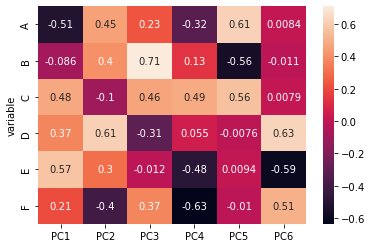

In [10]:
#correlation matrix plot
import seaborn as sns
import matplotlib.pyplot as plt
a = sns.heatmap(loadings_data, annot=True)
plt.show()

In [11]:
#share of each principal component in total variation
pca.explained_variance_ratio_

array([0.2978742 , 0.27481252, 0.23181442, 0.19291638, 0.00144353,
       0.00113895])

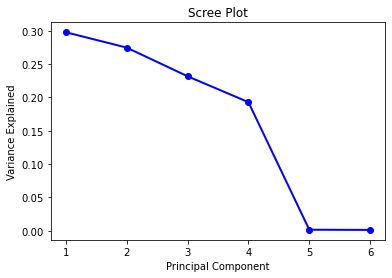

In [12]:
#scree plot
pc_values = np.arange(pca.n_components_) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [14]:
#get pc scores
pca_score = PCA().fit_transform(data_st)
pca_score

array([[ 1.68103382e+00,  2.81128580e+00, -5.60305386e-01,
        -1.02888221e+00,  2.80272767e-03, -1.08271325e-03],
       [-1.22564112e+00, -1.01477796e+00,  4.10949014e-01,
        -2.68741369e-01, -8.69804321e-03,  1.70794709e-03],
       [ 2.44199061e+00,  3.15695425e+00, -4.83189443e-01,
        -1.64287243e+00,  2.69592771e-03,  5.10858414e-03],
       ...,
       [-1.74750231e+00, -9.29558375e-01, -2.19739756e+00,
        -1.77095057e+00, -3.53376271e-03,  6.80098107e-03],
       [-3.51868836e-01, -2.00551729e-01, -2.06102374e+00,
        -9.84882176e-01,  4.58917333e-03, -8.67589623e-02],
       [ 4.99735383e-01, -4.08846186e-01, -6.39934975e-01,
        -2.35486111e-01, -3.70850857e-03,  3.78146628e-03]])

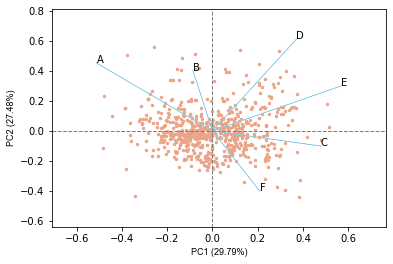

In [17]:
#get 2D biplot
from bioinfokit.visuz import cluster
pca_out = PCA().fit(data_st)
pca_score = PCA().fit_transform(data_st)
loadings = pca_out.components_
cluster.biplot(cscore=pca_score, show=True, loadings=loadings, labels=data.columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2))